<a href="https://colab.research.google.com/github/SagarSonar2698/Delivery_project/blob/main/delhivery_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

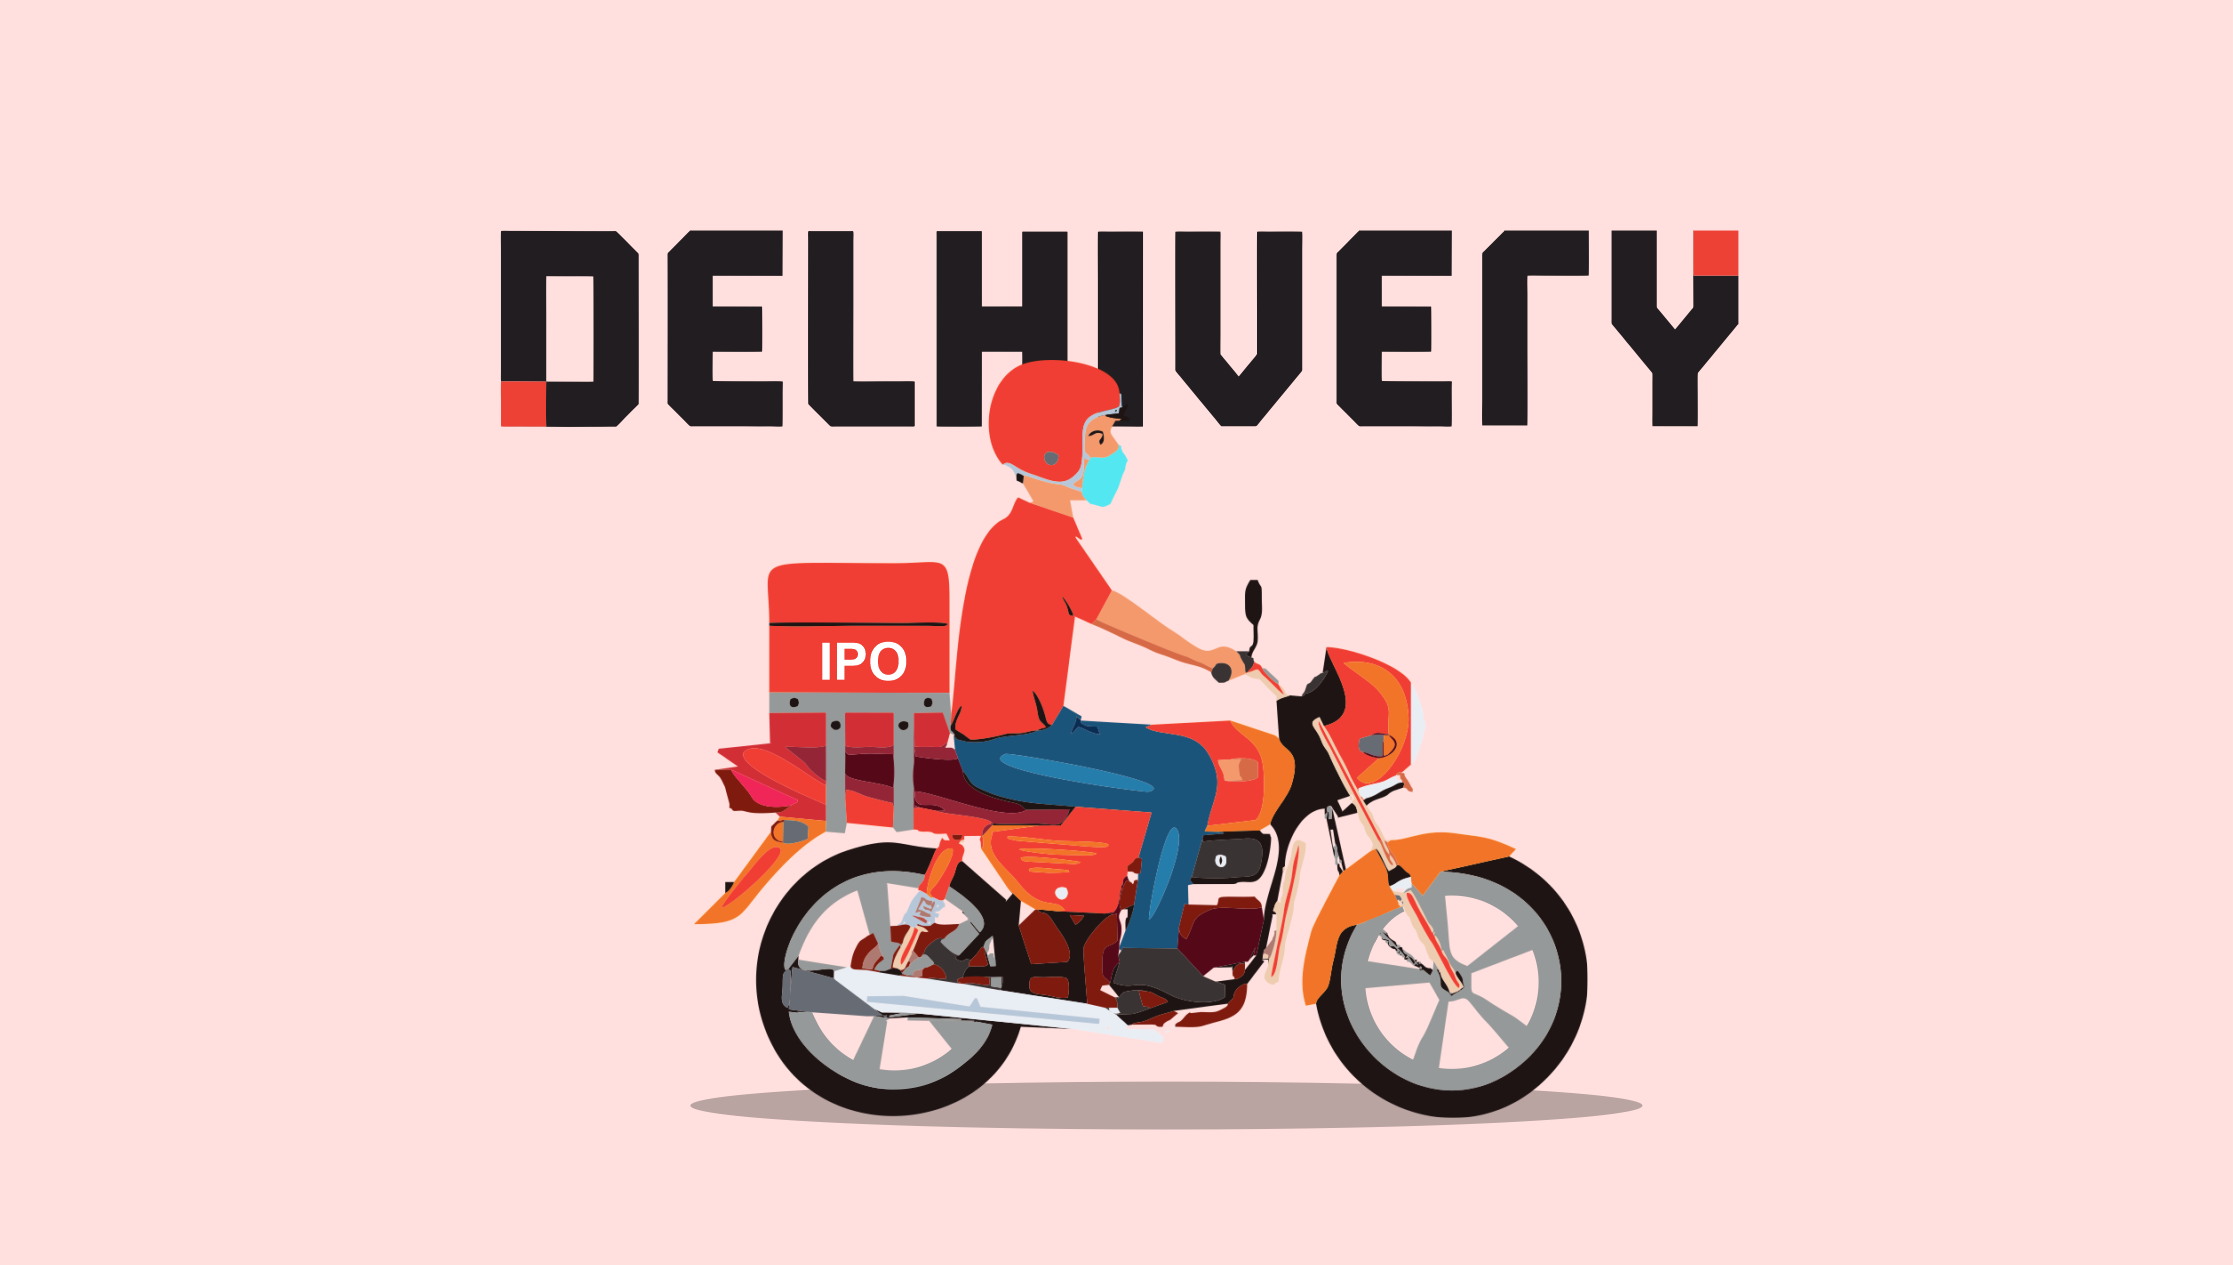

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats
import seaborn as sns
from statsmodels.graphics.gofplots import qqplot, qqplot_2samples 
from scipy.stats import ttest_ind, f_oneway, kruskal 


In [ ]:
df = pd.read_csv('/content/delhivery_data.csv')

In [ ]:
df

,data,trip_creation_time,route_schedule_uuid,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,od_start_time,...,cutoff_timestamp,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,factor,segment_actual_time,segment_osrm_time,segment_osrm_distance,segment_factor
0,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:27:55,10.435660,14.0,11.0,11.9653,1.272727,14.0,11.0,11.9653,1.272727
1,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:17:55,18.936842,24.0,20.0,21.7243,1.200000,10.0,9.0,9.7590,1.111111
2,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 04:01:19.505586,27.637279,40.0,28.0,32.5395,1.428571,16.0,7.0,10.8152,2.285714
3,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:39:57,36.118028,62.0,40.0,45.5620,1.550000,21.0,12.0,13.0224,1.750000
4,training,2018-09-20 02:35:36.476840,thanos::sroute:eb7bfc78-b351-4c0e-a951-fa3d5c3...,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),2018-09-20 03:21:32.418600,...,2018-09-20 03:33:55,39.386040,68.0,44.0,54.2181,1.545455,6.0,5.0,3.9153,1.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,training,2018-09-26 10:58:08.150592,thanos::sroute:2f34b3e1-eec1-4ef2-8ae7-474cedc...,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),2018-09-26 10:58:08.150592,...,2018-09-26 18:35:17,66.568569,87.0,51.0,71.2444,1.705882,28.0,16.0,22.7048,1.750000
8190,training,2018-09-26 10:58:08.150592,thanos::sroute:2f34b3e1-eec1-4ef2-8ae7-474cedc...,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),2018-09-26 10:58:08.150592,...,2018-09-26 18:09:17,88.907029,113.0,67.0,94.6771,1.686567,26.0,16.0,23.4327,1.625000
8191,training,2018-09-26 10:58:08.150592,thanos::sroute:2f34b3e1-eec1-4ef2-8ae7-474cedc...,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),2018-09-26 10:58:08.150592,...,2018-09-26 17:41:19,111.527345,141.0,85.0,119.4503,1.658824,27.0,17.0,24.7733,1.588235
8192,training,2018-09-26 10:58:08.150592,thanos::sroute:2f34b3e1-eec1-4ef2-8ae7-474cedc...,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),2018-09-26 10:58:08.150592,...,2018-09-26 17:11:18,133.440656,171.0,105.0,149.6405,1.628571,30.0,19.0,30.1902,1.578947


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_schedule_uuid', 'route_type',
       'trip_uuid', 'source_center', 'source_name', 'destination_center',
       'destination_name', 'od_start_time', 'od_end_time',
       'start_scan_to_end_scan', 'is_cutoff', 'cutoff_factor',
       'cutoff_timestamp', 'actual_distance_to_destination', 'actual_time',
       'osrm_time', 'osrm_distance', 'factor', 'segment_actual_time',
       'segment_osrm_time', 'segment_osrm_distance', 'segment_factor'],
      dtype='object')

In [ ]:
# dropping all the unknown data columns
df.drop(columns = ['is_cutoff','cutoff_factor','cutoff_timestamp','factor','segment_factor'],inplace=True)

In [ ]:
df.drop(columns = ['route_schedule_uuid'],inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8194 entries, 0 to 8193
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   data                            8194 non-null   object 
 1   trip_creation_time              8194 non-null   object 
 2   route_type                      8194 non-null   object 
 3   trip_uuid                       8194 non-null   object 
 4   source_center                   8194 non-null   object 
 5   source_name                     8169 non-null   object 
 6   destination_center              8194 non-null   object 
 7   destination_name                8184 non-null   object 
 8   od_start_time                   8194 non-null   object 
 9   od_end_time                     8194 non-null   object 
 10  start_scan_to_end_scan          8194 non-null   float64
 11  actual_distance_to_destination  8193 non-null   float64
 12  actual_time                     81

### **Finding missing values**

In [ ]:
df.isna().sum()

data                               0
trip_creation_time                 0
route_type                         0
trip_uuid                          0
source_center                      0
source_name                       25
destination_center                 0
destination_name                  10
od_start_time                      0
od_end_time                        0
start_scan_to_end_scan             0
actual_distance_to_destination     1
actual_time                        1
osrm_time                          1
osrm_distance                      1
segment_actual_time                1
segment_osrm_time                  1
segment_osrm_distance              1
dtype: int64

## **Treating missing values and null values**

since we can see source_name and destination_name contains null values we can replace them with them source_centre and destination_centre respectively

In [ ]:
df['source_name'].fillna(df['source_center'], inplace=True)
df['destination_name'].fillna(df['destination_center'], inplace=True)

In [ ]:
df.isna().sum()

data                              0
trip_creation_time                0
route_type                        0
trip_uuid                         0
source_center                     0
source_name                       0
destination_center                0
destination_name                  0
od_start_time                     0
od_end_time                       0
start_scan_to_end_scan            0
actual_distance_to_destination    1
actual_time                       1
osrm_time                         1
osrm_distance                     1
segment_actual_time               1
segment_osrm_time                 1
segment_osrm_distance             1
dtype: int64

### **In-depth analysis and feature engineering**

In [ ]:
# converting od_start_time and od_end_time into datetime function
df['od_start_time'] = pd.to_datetime(df['od_start_time'])
df['od_end_time'] = pd.to_datetime(df['od_end_time'])

In [ ]:
df['actual_scan_time'] = df['od_end_time'] - df['od_start_time']
df['actual_scan_time'] =  (df['actual_scan_time'].dt.total_seconds())/60

In [ ]:
df.drop(columns = ['od_start_time','od_end_time'],inplace = True)

In [ ]:
df

,data,trip_creation_time,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_distance_to_destination,actual_time,osrm_time,osrm_distance,segment_actual_time,segment_osrm_time,segment_osrm_distance,actual_scan_time
0,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,10.435660,14.0,11.0,11.9653,14.0,11.0,11.9653,86.213637
1,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,18.936842,24.0,20.0,21.7243,10.0,9.0,9.7590,86.213637
2,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,27.637279,40.0,28.0,32.5395,16.0,7.0,10.8152,86.213637
3,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,36.118028,62.0,40.0,45.5620,21.0,12.0,13.0224,86.213637
4,training,2018-09-20 02:35:36.476840,Carting,trip-153741093647649320,IND388121AAA,Anand_VUNagar_DC (Gujarat),IND388620AAB,Khambhat_MotvdDPP_D (Gujarat),86.0,39.386040,68.0,44.0,54.2181,6.0,5.0,3.9153,86.213637
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8189,training,2018-09-26 10:58:08.150592,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),549.0,66.568569,87.0,51.0,71.2444,28.0,16.0,22.7048,549.478879
8190,training,2018-09-26 10:58:08.150592,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),549.0,88.907029,113.0,67.0,94.6771,26.0,16.0,23.4327,549.478879
8191,training,2018-09-26 10:58:08.150592,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),549.0,111.527345,141.0,85.0,119.4503,27.0,17.0,24.7733,549.478879
8192,training,2018-09-26 10:58:08.150592,FTL,trip-153795948815035527,IND501359AAE,Hyderabad_Shamshbd_H (Telangana),IND506002AAA,Warangal_HunterRd_I (Telangana),549.0,133.440656,171.0,105.0,149.6405,30.0,19.0,30.1902,549.478879


In [ ]:
df.columns

Index(['data', 'trip_creation_time', 'route_type', 'trip_uuid',
       'source_center', 'source_name', 'destination_center',
       'destination_name', 'start_scan_to_end_scan',
       'actual_distance_to_destination', 'actual_time', 'osrm_time',
       'osrm_distance', 'segment_actual_time', 'segment_osrm_time',
       'segment_osrm_distance', 'actual_scan_time'],
      dtype='object')

In [ ]:
df_final = df.groupby(['route_type','trip_uuid','source_center', 'source_name', 'destination_center',
                      'destination_name'
                      ]).agg({'start_scan_to_end_scan':'sum','actual_scan_time' : 'sum','actual_distance_to_destination':'last','osrm_distance':'last','segment_osrm_distance':'sum',
                                                      'actual_time' : 'last','osrm_time' : 'last','segment_actual_time':'sum','segment_osrm_time':'sum'})

In [ ]:
df_final.reset_index(inplace = True)

In [ ]:
df_final

,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_scan_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time
0,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),1260.0,1260.384995,39.495954,46.9087,56.7577,241.0,33.0,240.0,49.0
1,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND501401AAC,Medchal_MROoffce_D (Telangana),118.0,119.408901,14.859201,16.0049,16.0049,30.0,12.0,30.0,12.0
2,Carting,trip-153671262893947351,IND501401AAC,Medchal_MROoffce_D (Telangana),IND500010AAA,Hyderabad_Alwal_I (Telangana),210.0,210.319679,9.499885,14.4597,14.4597,165.0,14.0,165.0,14.0
3,Carting,trip-153671320807895983,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121102AAA,Palwal (Haryana),330.0,333.699346,37.859167,39.7245,39.7244,45.0,28.0,44.0,27.0
4,Carting,trip-153671320807895983,IND121102AAA,Palwal (Haryana),IND121004AAB,FBD_Balabhgarh_DPC (Haryana),965.0,968.480096,38.372339,40.2548,40.4251,100.0,29.0,98.0,28.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,FTL,trip-153860611759727126,IND361001AAA,Jamnagar_Dc (Gujarat),IND361305AAC,Khambhalia_JdswarRD_D (Gujarat),300.0,300.911071,49.694455,54.5780,54.5780,71.0,40.0,70.0,38.0
1646,FTL,trip-153860909786408355,IND384170AAA,Unjha_DC (Gujarat),IND384265AAB,Patan_Central_D_2 (Gujarat),62.0,63.678081,24.550591,27.1193,27.1192,31.0,24.0,31.0,24.0
1647,FTL,trip-153860909786408355,IND384205AAA,Mehsana_Panchot_IP (Gujarat),IND384170AAA,Unjha_DC (Gujarat),114.0,114.011298,22.989321,28.2656,28.2656,50.0,28.0,50.0,28.0
1648,FTL,trip-153860909786408355,IND384265AAB,Patan_Central_D_2 (Gujarat),IND385320AAA,Bhabhar_TirupDPP_D (Gujarat),357.0,359.750967,60.289747,83.5911,78.2801,86.0,75.0,85.0,82.0


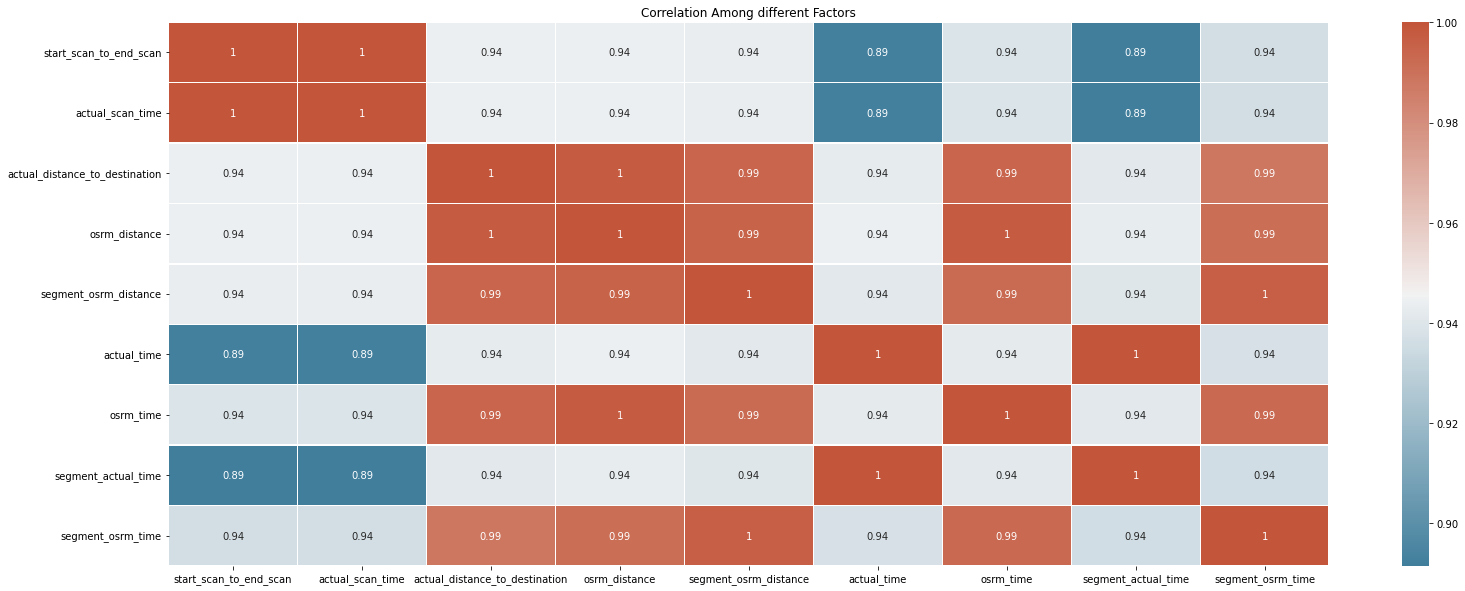

In [ ]:
df_final_corr = df_final.corr()
plt.figure(figsize=(26,10))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
plt.title('Correlation Among different Factors')
sns.heatmap(df_final_corr, annot=True, linewidths=.5, linecolor='white', cmap=cmap)
plt.show()

# **Outlier treatment**

lets analyse which of the columns consist of outliers using box plot

In [ ]:
df_final.describe()

,start_scan_to_end_scan,actual_scan_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time
count,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000,1650.000000
mean,4045.430303,4047.864489,80.549229,100.231514,108.938987,179.170303,80.399394,177.566061,89.436970
std,20982.220853,20985.871585,181.910955,220.804906,247.179941,331.352290,161.617994,328.281819,185.465409
min,33.000000,33.102313,9.068716,9.709400,9.709400,13.000000,8.000000,13.000000,7.000000
25%,204.000000,204.633096,21.788254,27.933375,28.544375,51.000000,25.000000,50.000000,25.000000
50%,462.500000,464.362178,34.799387,42.903500,44.836400,85.000000,38.500000,84.000000,42.000000
75%,1154.250000,1159.318993,62.350617,80.551850,86.943400,162.000000,67.000000,161.000000,74.000000
max,257257.000000,257285.923733,1722.009755,2191.166400,2363.317500,3031.000000,1611.000000,3002.000000,1779.000000


In [ ]:
df_final.columns

Index(['route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time'],
      dtype='object')

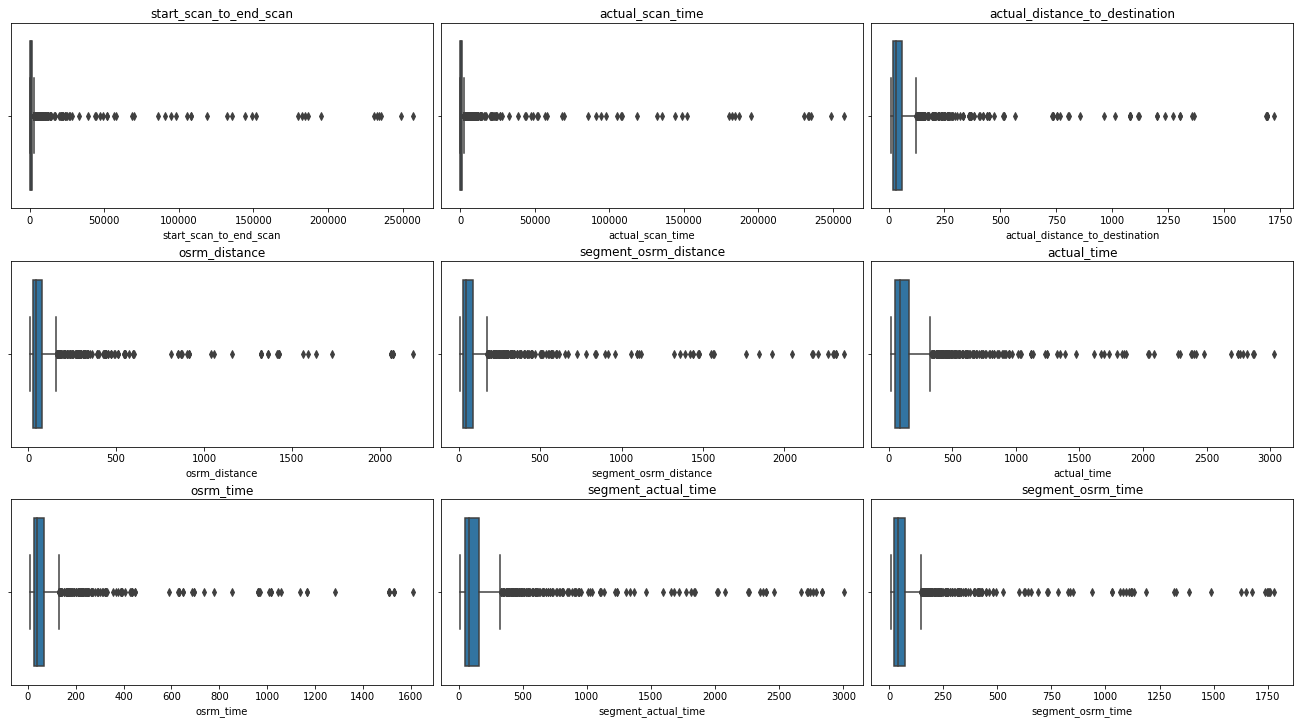

In [ ]:
columns = ['start_scan_to_end_scan', 'actual_scan_time',
       'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time']
i = 1
plt.figure(figsize = (18,10))
for column in columns:
  plt.subplot(3,3,i)
  sns.boxplot(x = df_final[column])
  plt.title(column)
  plt.tight_layout(pad = 0.5)
  i+=1


In [ ]:
# for start_scan_to_end_scan using iqr oulier removal
q1 = df_final['start_scan_to_end_scan'].quantile(0.25)
q3 = df_final['start_scan_to_end_scan'].quantile(0.75)
iqr = q3 - q1
x1 = df_final[(df_final['start_scan_to_end_scan']>(q1-1.5*iqr) ) & (df_final['start_scan_to_end_scan']<(q3+1.5*iqr))]



In [ ]:
# for actual_scan_time using iqr oulier removal
q1 = df_final['actual_scan_time'].quantile(0.25)
q3 = df_final['actual_scan_time'].quantile(0.75)
iqr = q3 - q1
x2 = df_final[(df_final['actual_scan_time']>(q1-1.5*iqr) ) & (df_final['actual_scan_time']<(q3+1.5*iqr))]


In [ ]:
# for actual_distance_to_destination using iqr oulier removal
q1 = df_final['actual_distance_to_destination'].quantile(0.25)
q3 = df_final['actual_distance_to_destination'].quantile(0.75)
iqr = q3 - q1
x3 = df_final[(df_final['actual_distance_to_destination']>(q1-1.5*iqr) ) & (df_final['actual_distance_to_destination']<(q3+1.5*iqr))]


In [ ]:
# for osrm_distance using iqr oulier removal
q1 = df_final['osrm_distance'].quantile(0.25)
q3 = df_final['osrm_distance'].quantile(0.75)
iqr = q3 - q1
x4 = df_final[(df_final['osrm_distance']>(q1-1.5*iqr) ) & (df_final['osrm_distance']<(q3+1.5*iqr))]


In [ ]:
# for segment_osrm_distance using iqr oulier removal
q1 = df_final['segment_osrm_distance'].quantile(0.25)
q3 = df_final['segment_osrm_distance'].quantile(0.75)
iqr = q3 - q1
x5 = df_final[(df_final['segment_osrm_distance']>(q1-1.5*iqr) ) & (df_final['segment_osrm_distance']<(q3+1.5*iqr))]


In [ ]:
# for segment_osrm_distance using iqr oulier removal
q1 = df_final['actual_time'].quantile(0.25)
q3 = df_final['actual_time'].quantile(0.75)
iqr = q3 - q1
x6 = df_final[(df_final['actual_time']>(q1-1.5*iqr) ) & (df_final['actual_time']<(q3+1.5*iqr))]


In [ ]:
# for osrm_time using iqr oulier removal
q1 = df_final['osrm_time'].quantile(0.25)
q3 = df_final['osrm_time'].quantile(0.75)
iqr = q3 - q1
x7 = df_final[(df_final['osrm_time']>(q1-1.5*iqr) ) & (df_final['osrm_time']<(q3+1.5*iqr))]


In [ ]:
# for segment_actual_time using iqr oulier removal
q1 = df_final['segment_actual_time'].quantile(0.25)
q3 = df_final['segment_actual_time'].quantile(0.75)
iqr = q3 - q1
x8 = df_final[(df_final['segment_actual_time']>(q1-1.5*iqr) ) & (df_final['segment_actual_time']<(q3+1.5*iqr))]


In [ ]:
# for segment_osrm_time using iqr oulier removal
q1 = df_final['segment_osrm_time'].quantile(0.25)
q3 = df_final['segment_osrm_time'].quantile(0.75)
iqr = q3 - q1
x9 = df_final[(df_final['segment_osrm_time']>(q1-1.5*iqr) ) & (df_final['segment_osrm_time']<(q3+1.5*iqr))]


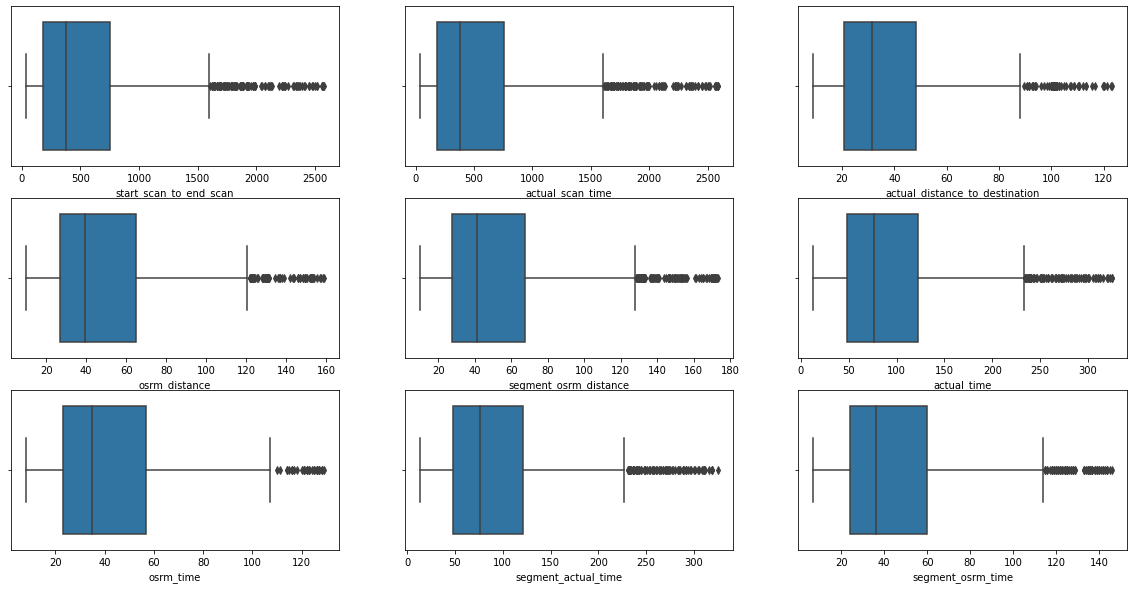

In [ ]:
plt.figure(figsize = (20,10))
plt.subplot(3,3,1)
sns.boxplot(x = x1['start_scan_to_end_scan'])
plt.subplot(3,3,2)
sns.boxplot(x = x2['actual_scan_time'])

plt.subplot(3,3,3)
sns.boxplot(x = x3['actual_distance_to_destination'])

plt.subplot(3,3,4)
sns.boxplot(x = x4['osrm_distance'])

plt.subplot(3,3,5)
sns.boxplot(x = x5['segment_osrm_distance'])

plt.subplot(3,3,6)
sns.boxplot(x = x6['actual_time'])

plt.subplot(3,3,7)
sns.boxplot(x = x7['osrm_time'])

plt.subplot(3,3,8)
sns.boxplot(x = x8['segment_actual_time'])

plt.subplot(3,3,9)
sns.boxplot(x = x9['segment_osrm_time'])
plt.show()




---
## **Q2.Compare the difference between Point a. and start_scan_to_end_scan. Do hypothesis testing/ Visual analysis to check.**

---



<Figure size 432x432 with 0 Axes>

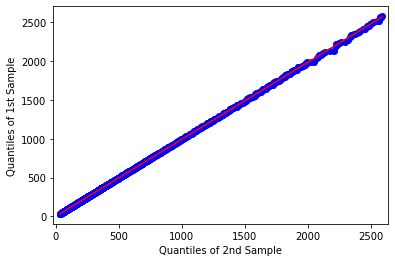

In [ ]:
# Quantile-Quantile plot
plt.figure(figsize = (6,6))
qqplot_2samples(x1['start_scan_to_end_scan'],x2['actual_scan_time'], line="r")
plt.show()

here we can see from qqplot quantiles of both the columns are matching and hence we can say that their distribution is same and mean is same

In [ ]:
# using hypothesis testing 
print(np.var(x1['start_scan_to_end_scan']))
print(np.var(x2['actual_scan_time']))

289650.90069463657
295504.72517374036


since varience of both the smaples are not same hence  we can performm kruskal  test here

H0 : mean for both columns is same i.e mu['start_scan_to_end_scan'] == mu['actual_scan_time']

H1 : mean for both column is not equal i.e mu['start_scan_to_end_scan'] != mu['actual_scan_time']


In [ ]:
kruskal(x1['actual_scan_time'],x2['start_scan_to_end_scan'])

KruskalResult(statistic=0.007197832449725673, pvalue=0.9323885606659443)

since we can see that p-value is around 72% hence we are fail to reject null hypothesis.

hence we can say that mean for both columns is same i.e mu['start_scan_to_end_scan'] == mu['actual_scan_time']



---
## **Q3 . Do hypothesis testing/ visual analysis between actual_time aggregated value and OSRM time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**


---




In [ ]:
df_final.columns

Index(['route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

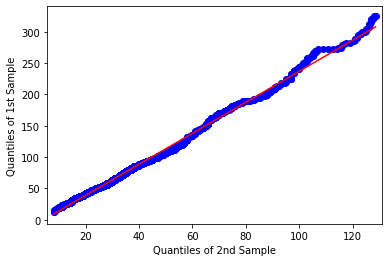

In [ ]:
# Quantile-Quantile plot
plt.figure(figsize = (10,6))
qqplot_2samples(x6['actual_time'],x7['osrm_time'], line="r")
plt.show()

In [ ]:
# using hypothesis testing 
print(np.var(x6['actual_time']))
print(np.var(x7['osrm_time']))

4152.936177763912
675.6204797926376


since varience for both the samples is not same same so again we have to use krskal test for this 

H0 : mean for both columns is same i.e mu['actual_time'] == mu['osrm_time']

H1 : mean for both column is not equal i.e mu['actual_time'] != mu['osrm_time']

In [ ]:
kruskal(x6['actual_time'],x7['osrm_time'])

KruskalResult(statistic=807.8787659698409, pvalue=1.0449270951396712e-177)

since we can see that p-value = 0% hence we are fail to reject null hypothesis.

hence we can say that mean for both columns is not same i.e mu['actual_time'] != mu['osrm_time']



---
##  **Q.4 Do hypothesis testing/ visual analysis between actual_time aggregated value and segment actual time aggregated value**


---








<Figure size 720x432 with 0 Axes>

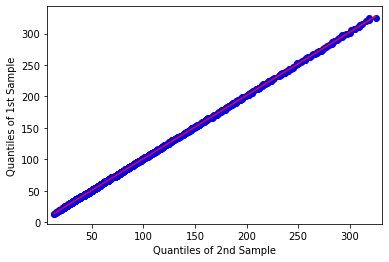

In [ ]:
# Quantile-Quantile plot
plt.figure(figsize = (10,6))
qqplot_2samples(x6['actual_time'],x8['segment_actual_time'], line="r")
plt.show()

qq_plot showing distribution of both the columns is same now lets check for their variences

In [ ]:
print(np.var(x6['actual_time']))
print(np.var(x8['segment_actual_time']))

4152.936177763912
4092.7349048174624


here we can see since the vairences of both the columns is not equal hence we will use kruskal test for this 

H0 : mean(df_final['actual_time']) ==  mean(df_final['segment_actual_time'])

H1 : mean(df_final['actual_time']) !=  mean(df_final['segment_actual_time'])

In [ ]:
kruskal(x6['actual_time'],x8['segment_actual_time'])

KruskalResult(statistic=0.19078293527634788, pvalue=0.6622657846653448)

here p_value = 26% hence with 95% confidence inverval we fail to reject H0 
hence 
we can say,

 mean(df_final['actual_time']) == mean(df_final['segment_actual_time'])

## **Q5 . Do hypothesis testing/ visual analysis between osrm distance aggregated value and segment osrm distance aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df_final.columns

Index(['route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

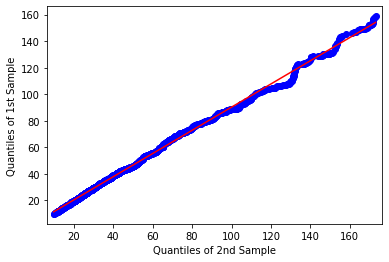

In [ ]:
# Quantile-Quantile plot
plt.figure(figsize = (10,6))
qqplot_2samples(x4['osrm_distance'],x5['segment_osrm_distance'], line="r")
plt.show()

here from QQ_plot we can see distribution of two data's not so same now lets check for their variences

In [ ]:
print(np.var(x4['osrm_distance']))
print(np.var(x5['segment_osrm_distance']))

1012.7986362308661
1325.0348673048163


since variences are not same we can use here kruskal test for anlysis of both the numerical column data

H0 : mean(df_final['osrm_distance']) == mean(df_final['segment_osrm_distance'])

H1 : mean(df_final['osrm_distance']) != mean(df_final['segment_osrm_distance'])

In [ ]:
kruskal(x4['osrm_distance'],x5['segment_osrm_distance'])

KruskalResult(statistic=4.677074247183787, pvalue=0.030567767365480048)

since p_value is low hence here we reject null hypothesis 
hence we can say,

mean(df_final['osrm_distance']) != mean(df_final['segment_osrm_distance'])

## **Q6.Do hypothesis testing/ visual analysis between osrm time aggregated value and segment osrm time aggregated value (aggregated values are the values you’ll get after merging the rows on the basis of trip_uuid)**

In [ ]:
df_final.columns

Index(['route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time'],
      dtype='object')

<Figure size 720x432 with 0 Axes>

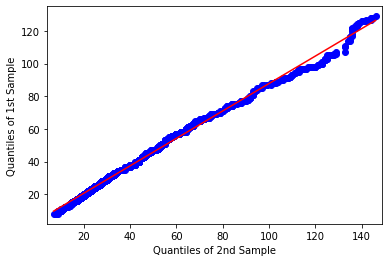

In [ ]:
# Quantile-Quantile plot
plt.figure(figsize = (10,6))
qqplot_2samples(x7['osrm_time'],x9['segment_osrm_time'], line="r")
plt.show()

In [ ]:
print(np.var(x7['osrm_time']))
print(np.var(x9['segment_osrm_time']))

675.6204797926376
953.1433372554823


since the varience is not same hence consider kruskal test

H0 : mean(df_final['osrm_time']) == mean(df_final['segment_osrm_time'])

H1 : mean(df_final['osrm_time']) != mean(df_final['segment_osrm_time'])

In [ ]:
kruskal(x7['osrm_time'],x9['segment_osrm_time'])

KruskalResult(statistic=3.856923386794555, pvalue=0.04954109403439924)

since p_value is very low we are fail to accept null hypothesis hence we can say,

H1 : mean(df_final['osrm_time']) != mean(df_final['segment_osrm_time'])


# **ONE HOT ENCOADING**

In [ ]:
df_final.columns

Index(['route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time'],
      dtype='object')

In [ ]:
df['route_type'].value_counts()

FTL        5375
Carting    2819
Name: route_type, dtype: int64

Now considering route_type column as catogorical column we will apply one hot encoading on this column to convert this column as numerical column

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'route_type' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df_final[['route_type']]).toarray())

#merge one-hot encoded columns back with original DataFrame
final_df = df_final.join(encoder_df)


In [ ]:
final_df

,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_scan_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,0,1
0,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),1260.0,1260.384995,39.495954,46.9087,56.7577,241.0,33.0,240.0,49.0,1.0,0.0
1,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND501401AAC,Medchal_MROoffce_D (Telangana),118.0,119.408901,14.859201,16.0049,16.0049,30.0,12.0,30.0,12.0,1.0,0.0
2,Carting,trip-153671262893947351,IND501401AAC,Medchal_MROoffce_D (Telangana),IND500010AAA,Hyderabad_Alwal_I (Telangana),210.0,210.319679,9.499885,14.4597,14.4597,165.0,14.0,165.0,14.0,1.0,0.0
3,Carting,trip-153671320807895983,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121102AAA,Palwal (Haryana),330.0,333.699346,37.859167,39.7245,39.7244,45.0,28.0,44.0,27.0,1.0,0.0
4,Carting,trip-153671320807895983,IND121102AAA,Palwal (Haryana),IND121004AAB,FBD_Balabhgarh_DPC (Haryana),965.0,968.480096,38.372339,40.2548,40.4251,100.0,29.0,98.0,28.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,FTL,trip-153860611759727126,IND361001AAA,Jamnagar_Dc (Gujarat),IND361305AAC,Khambhalia_JdswarRD_D (Gujarat),300.0,300.911071,49.694455,54.5780,54.5780,71.0,40.0,70.0,38.0,0.0,1.0
1646,FTL,trip-153860909786408355,IND384170AAA,Unjha_DC (Gujarat),IND384265AAB,Patan_Central_D_2 (Gujarat),62.0,63.678081,24.550591,27.1193,27.1192,31.0,24.0,31.0,24.0,0.0,1.0
1647,FTL,trip-153860909786408355,IND384205AAA,Mehsana_Panchot_IP (Gujarat),IND384170AAA,Unjha_DC (Gujarat),114.0,114.011298,22.989321,28.2656,28.2656,50.0,28.0,50.0,28.0,0.0,1.0
1648,FTL,trip-153860909786408355,IND384265AAB,Patan_Central_D_2 (Gujarat),IND385320AAA,Bhabhar_TirupDPP_D (Gujarat),357.0,359.750967,60.289747,83.5911,78.2801,86.0,75.0,85.0,82.0,0.0,1.0


In [ ]:
final_df.rename(columns = {0 : 'FTL',1 : 'Carting'},inplace = True)

In [ ]:
final_df

,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_scan_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,FTL,Carting
0,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),1260.0,1260.384995,39.495954,46.9087,56.7577,241.0,33.0,240.0,49.0,1.0,0.0
1,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND501401AAC,Medchal_MROoffce_D (Telangana),118.0,119.408901,14.859201,16.0049,16.0049,30.0,12.0,30.0,12.0,1.0,0.0
2,Carting,trip-153671262893947351,IND501401AAC,Medchal_MROoffce_D (Telangana),IND500010AAA,Hyderabad_Alwal_I (Telangana),210.0,210.319679,9.499885,14.4597,14.4597,165.0,14.0,165.0,14.0,1.0,0.0
3,Carting,trip-153671320807895983,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121102AAA,Palwal (Haryana),330.0,333.699346,37.859167,39.7245,39.7244,45.0,28.0,44.0,27.0,1.0,0.0
4,Carting,trip-153671320807895983,IND121102AAA,Palwal (Haryana),IND121004AAB,FBD_Balabhgarh_DPC (Haryana),965.0,968.480096,38.372339,40.2548,40.4251,100.0,29.0,98.0,28.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1645,FTL,trip-153860611759727126,IND361001AAA,Jamnagar_Dc (Gujarat),IND361305AAC,Khambhalia_JdswarRD_D (Gujarat),300.0,300.911071,49.694455,54.5780,54.5780,71.0,40.0,70.0,38.0,0.0,1.0
1646,FTL,trip-153860909786408355,IND384170AAA,Unjha_DC (Gujarat),IND384265AAB,Patan_Central_D_2 (Gujarat),62.0,63.678081,24.550591,27.1193,27.1192,31.0,24.0,31.0,24.0,0.0,1.0
1647,FTL,trip-153860909786408355,IND384205AAA,Mehsana_Panchot_IP (Gujarat),IND384170AAA,Unjha_DC (Gujarat),114.0,114.011298,22.989321,28.2656,28.2656,50.0,28.0,50.0,28.0,0.0,1.0
1648,FTL,trip-153860909786408355,IND384265AAB,Patan_Central_D_2 (Gujarat),IND385320AAA,Bhabhar_TirupDPP_D (Gujarat),357.0,359.750967,60.289747,83.5911,78.2801,86.0,75.0,85.0,82.0,0.0,1.0


# **Normalize/ Standardize the numerical features using MinMaxScaler or StandardScaler.**

StandardScaler is useful for the features that follow a Normal distribution.Therefore, it makes mean = 0 and scales the data to unit variance.

MinMaxScaler may be used when the upper and lower boundaries are well known from domain knowledge.MinMaxScaler scales all the data features in the range [0, 1] or else in the range [-1, 1] if there are negative values in the dataset.This scaling compresses all the inliers in the narrow range.


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

# **Normalization using minmaxscaler**

In [ ]:
final_df.columns

Index(['route_type', 'trip_uuid', 'source_center', 'source_name',
       'destination_center', 'destination_name', 'start_scan_to_end_scan',
       'actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time', 'FTL', 'Carting'],
      dtype='object')

for minmax_scaler = (x - x_min) / (x_max - x_min)

In [ ]:
min_max_df = final_df.copy(deep=True)

In [ ]:
min_max_df['start_scan_to_end_scan'] = (min_max_df['start_scan_to_end_scan'] - np.min(min_max_df['start_scan_to_end_scan'])) / (np.max(min_max_df['start_scan_to_end_scan']) - np.min(min_max_df['start_scan_to_end_scan']))

In [ ]:
columns = ['actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time',]

for column in columns:
  min_max_df[column] = (min_max_df[column] - np.min(min_max_df[column])) / (np.max(min_max_df[column]) - np.min(min_max_df[column]))

**data frame after normalizing all the numerical columns according to minmaxscaler**

In [ ]:
min_max_df.head(5)

,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_scan_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,FTL,Carting
0,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),0.004770,0.004771,0.017763,0.017053,0.019990,0.075547,0.015596,0.075945,0.023702,1.0,0.0
1,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND501401AAC,Medchal_MROoffce_D (Telangana),0.000330,0.000335,0.003380,0.002886,0.002675,0.005633,0.002495,0.005688,0.002822,1.0,0.0
2,Carting,trip-153671262893947351,IND501401AAC,Medchal_MROoffce_D (Telangana),IND500010AAA,Hyderabad_Alwal_I (Telangana),0.000688,0.000689,0.000252,0.002178,0.002018,0.050364,0.003743,0.050853,0.003950,1.0,0.0
3,Carting,trip-153671320807895983,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121102AAA,Palwal (Haryana),0.001155,0.001168,0.016808,0.013759,0.012753,0.010603,0.012477,0.010371,0.011287,1.0,0.0
4,Carting,trip-153671320807895983,IND121102AAA,Palwal (Haryana),IND121004AAB,FBD_Balabhgarh_DPC (Haryana),0.003623,0.003636,0.017107,0.014002,0.013050,0.028827,0.013100,0.028438,0.011851,1.0,0.0


# **normalization of numerical variables using standered scaler**

In [ ]:
std_scaler_df = final_df.copy(deep=True)

In [ ]:
columns = ['start_scan_to_end_scan','actual_scan_time', 'actual_distance_to_destination', 'osrm_distance',
       'segment_osrm_distance', 'actual_time', 'osrm_time',
       'segment_actual_time', 'segment_osrm_time']

for column in columns:
  std_scaler_df[column] = (std_scaler_df[column] - np.mean(std_scaler_df[column]))/np.std(std_scaler_df[column])

**data frame after implimenting standered scaler normalization**

In [ ]:
std_scaler_df.head(5)

,route_type,trip_uuid,source_center,source_name,destination_center,destination_name,start_scan_to_end_scan,actual_scan_time,actual_distance_to_destination,osrm_distance,segment_osrm_distance,actual_time,osrm_time,segment_actual_time,segment_osrm_time,FTL,Carting
0,Carting,trip-153671237597058150,IND785690AAB,Sonari_Central_DPP_1 (Assam),IND785682AAA,Sivasagar_Babupaty_D (Assam),-0.132792,-0.132867,-0.225746,-0.241566,-0.211170,0.186655,-0.293369,0.190242,-0.218096,1.0,0.0
1,Carting,trip-153671262893947351,IND500055AAC,Hyderabad_North_D_2 (Telangana),IND501401AAC,Medchal_MROoffce_D (Telangana),-0.187236,-0.187252,-0.361220,-0.381568,-0.376091,-0.450323,-0.423345,-0.449647,-0.417654,1.0,0.0
2,Carting,trip-153671262893947351,IND501401AAC,Medchal_MROoffce_D (Telangana),IND500010AAA,Hyderabad_Alwal_I (Telangana),-0.182850,-0.182919,-0.390691,-0.388568,-0.382345,-0.042778,-0.410966,-0.038290,-0.406867,1.0,0.0
3,Carting,trip-153671320807895983,IND121004AAB,FBD_Balabhgarh_DPC (Haryana),IND121102AAA,Palwal (Haryana),-0.177129,-0.177038,-0.234747,-0.274112,-0.280102,-0.405040,-0.324316,-0.406987,-0.336752,1.0,0.0
4,Carting,trip-153671320807895983,IND121102AAA,Palwal (Haryana),IND121004AAB,FBD_Balabhgarh_DPC (Haryana),-0.146856,-0.146781,-0.231925,-0.271710,-0.277266,-0.239003,-0.318127,-0.242445,-0.331359,1.0,0.0
